<h2> Logistic Regression with pytorch </h2>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x = [1, 5, 10, 25, 50, 70, 75, 100]
y = [0,0,0,0,1,1,1,1]

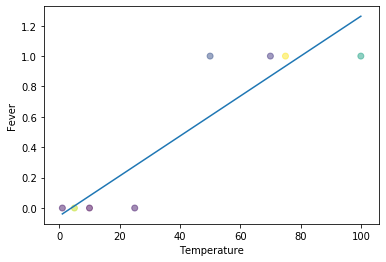

In [68]:
colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y,1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")
plt.scatter(x, y , c= colors, alpha=0.5)

<b> Linear Regression problem </b>
<hr>
fever can go negative and positive

<h2> Logistic Regression </h2>
<hr/>
<b> Predicting Probablity </b>
<ul>
    <li>Linear regression doesnot work </li>
    <li>Instead of predicting direct values predict <b> Probablities </b></li>
</ul>

In [69]:
import math

In [70]:
print(-math.log(1-0.00001))
print(-math.log(1-0.99999))
print(-math.log(0.99999))
print(-math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
1.0000050000287824e-05
11.512925464970229


<h2> Logistic Regression with pytorch </h2>
<ul>
    <li><b>step 1:</b> Load dataset </li>
    <li><b>step 2:</b> Make dataset iterable </li>
    <li><b>step 3:</b> Create model class </li>
    <li><b>step 4:</b> Instantiate model class </li>
    <li><b>step 5:</b> Instantiate loss class </li>
    <li><b>step 6:</b> Instantiate optimizer class </li>
    <li><b>step 7:</b> Train model </li>
</ul>

In [71]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

<b>Step 1:</b> Load MNIST dataset

In [72]:
train_dataset = dsets.MNIST(root = './data', train=True, transform = transforms.ToTensor(), download = True)

In [73]:
print(len(train_dataset))
print(type(train_dataset))

60000
<class 'torchvision.datasets.mnist.MNIST'>


In [74]:
print(train_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [75]:
print(type(train_dataset[0]))

<class 'tuple'>


In [76]:
# Input matrix
print(train_dataset[0][0].size())

# Label
print(train_dataset[0][1])

torch.Size([1, 28, 28])
5


<h3>Displaying MNIST</h3>

In [77]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [78]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

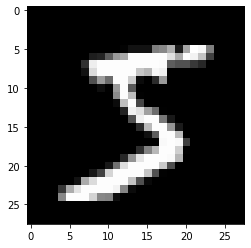

In [79]:
plt.imshow(show_img, cmap = 'gray')

<b> Loading the test dataset </b>

In [80]:
test_dataset = dsets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

In [81]:
len(test_dataset)

10000

In [82]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

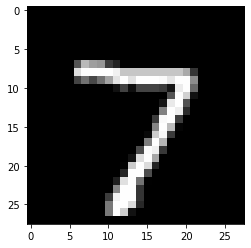

In [83]:
plt.imshow(test_dataset[0][0].reshape(28, 28), cmap = 'gray')

In [84]:
# label
test_dataset[0][1]

7

<b> Make the dataset iterable </b>
 

In [85]:
batch_size = 100
n_iters = 3000

In [86]:
num_epochs = int(n_iters/(len(train_dataset)/batch_size))

In [87]:
num_epochs

5

<b> Create dataset iterable </b>

In [88]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)

<b> Check Iterablity </b>

In [89]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [90]:
# Iterable Object
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle= True)

In [91]:
isinstance(test_loader, collections.Iterable)

True

In [92]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [93]:
# Need to iterate 
# Think numbers as images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


In [94]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
        

In [95]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)
loss = nn.CrossEntropyLoss()

# Optimizerm

In [96]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<b> Parameters in depth </b>

In [97]:
print(model.parameters())
print(len(list(model.parameters())))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x11e728c00>
2
torch.Size([10, 784])
torch.Size([10])


<b> Training the model </b>

In [98]:
    for i, (images, labels) in enumerate(train_loader):

        # load image as a variable
        images = torch.zeros((2,2))
        labels = labels
        
        print(type(images))
        break


<class 'torch.Tensor'>


In [106]:
criterion = nn.CrossEntropyLoss()
iter = 0
for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        # load image as a variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clearing the gradient
        optimizer.zero_grad()
        
        # Forward pass to get the output
        outputs = model(images)
        
        loss =criterion(outputs, labels)
        
        # calculating the gradients
        loss.backward()
        
        # updating the parameters
        optimizer.step()

        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                labels = Variable(labels)
                
                outputs = model(images)
                
                # Get prediction from the maximum value
                _, prediction = torch.max(outputs.data, 1)

                # total no of labels
                total += labels.size(0)
                
                # total correct predictions
                correct += (prediction == labels).sum()
                
            accuracy = 100 * correct / total
            
            print("Iteration : {}, loss : {}, Accuracy : {}".format(iter, loss, accuracy))
            
        
        
        

Iteration : 500, loss : 0.32038840651512146, Accuracy : 90
Iteration : 1000, loss : 0.4494479298591614, Accuracy : 90
Iteration : 1500, loss : 0.45995914936065674, Accuracy : 90
Iteration : 2000, loss : 0.48823997378349304, Accuracy : 90
Iteration : 2500, loss : 0.34509700536727905, Accuracy : 90
Iteration : 3000, loss : 0.48294907808303833, Accuracy : 90
